In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\S\OneDrive - Higher Education Commission\Documents\ML\50_Startups (1).csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isnull().sum

<bound method DataFrame.sum of     R&D Spend  Administration  Marketing Spend  State  Profit
0       False           False            False  False   False
1       False           False            False  False   False
2       False           False            False  False   False
3       False           False            False  False   False
4       False           False            False  False   False
5       False           False            False  False   False
6       False           False            False  False   False
7       False           False            False  False   False
8       False           False            False  False   False
9       False           False            False  False   False
10      False           False            False  False   False
11      False           False            False  False   False
12      False           False            False  False   False
13      False           False            False  False   False
14      False           False          

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

<function matplotlib.pyplot.show(close=None, block=None)>

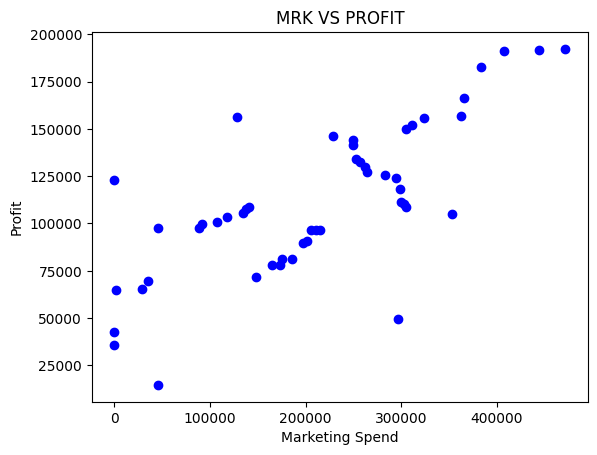

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df["Marketing Spend"], df["Profit"],color='blue', marker='o')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('MRK VS PROFIT')
plt.show

In [15]:
X = df[["Marketing Spend"]]
Y = df["Profit"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)
Lr = LinearRegression()
Lr.fit(X_train, Y_train)
Y_pred = Lr.predict(X_test)
r2_score =r2_score(Y_test, Y_pred)
MSE = mean_squared_error( Y_test, Y_pred)

In [16]:
import joblib
joblib.dump(Lr, r'C:\Users\S\OneDrive - Higher Education Commission\Documents\ML\sobia pkl')

['C:\\Users\\S\\OneDrive - Higher Education Commission\\Documents\\ML\\sobia pkl']

In [19]:
import gradio as gr
import joblib as jb
model = jb.load(r"C:\Users\S\OneDrive - Higher Education Commission\Documents\ML\sobia pkl")

def predict_salary(RD_spend,mar_spend,admin):
    features = np.array([[RD_spend,mar_spend,admin]])
    prediction = model.predict(features)
    return f"Predicted Class: {prediction[0]}"


inputs = [
    gr.Number(label="R&D Spend $"),
    gr.Number(label="Marketing Spend $"),
    gr.Number(label="Administration Spend $")

   ]

output = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_salary, inputs=inputs, outputs=output, title="Profit Predictor").launch()

C:\Users\S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
